# Bias on Wikipedia

## Todd Schultz
Due: November 2, 2017

Bias is an increasing important topic with today's reliance on data and aglorithms. Here, bias in policitical articles on the English Wikipedia will be investigated in terms of number of articles about politicians for each country normalized by population and the percentage of total number of articles about policitians that are considered high-quality as predicted by a machine learning model. The results can then be reviewed to observe any biases or trends present. 

# Imports
The Python libraries used in the analysis throughout this notebook are imported here. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import copy

%matplotlib notebook

# Import data of politicians by country

Import the data of policitcians by country provided by Oliver Keyes and found at https://figshare.com/articles/Untitled_Item/5513449. This data set contains the name of the country, the name of the politician as representented by the name of the English Wikipedia article about them, and the revision or article identification number in the English Wikipedia. 

In [8]:
politicianFile = 'PolbyCountry_data.csv'
politicianNames = pd.read_csv(politicianFile)

# rename variables
politicianNames.rename(columns = {'page':'article_name'}, inplace = True)
politicianNames.rename(columns = {'rev_id':'revision_id'}, inplace = True)
politicianNames[0:4]

,article_name,country,revision_id
0,Template:ZambiaProvincialMinisters,Zambia,235107991
1,Bir I of Kanem,Chad,355319463
2,Template:Zimbabwe-politician-stub,Zimbabwe,391862046
3,Template:Uganda-politician-stub,Uganda,391862070


In [9]:
politicianNames.shape

(47197, 3)

# Import population by country

Import the population by country provided PRB and found at http://www.prb.org/DataFinder/Topic/Rankings.aspx?ind=14. The data is from mid-2015 and includes the name of the country and the population estimate. 

In [10]:
countryFile = 'Population Mid-2015.csv'
tempDF = pd.read_csv(countryFile, header=1)

# change population to a numeric value
a = np.zeros(tempDF.shape[0])
for idata in range(0,tempDF.shape[0]):
    b = tempDF['Data'][idata]
    a[idata] = float(b.replace(',', ''))

#countryPop = pd.DataFrame(data={'country': tempDF['Location'], 'population': tempDF['Data']})
countryPop = pd.DataFrame(data={'country': tempDF['Location'], 'population': a})

countryPop[0:5]

,country,population
0,Afghanistan,32247000.0
1,Albania,2892000.0
2,Algeria,39948000.0
3,Andorra,78000.0
4,Angola,25000000.0


# Combined data
Combine the data frames into a single data frame with the following variables. 
Column, country, article_name, revision_id, article_quality, population
Make a placeholder, empty variable for article_quality to be filled in in the next section using the Wikipedia ORES API for predicting article quality. Merging the data sets here also eliminates any entries in the policitian names who countries population is unavailable and removes any countries that have no English Wikipedia articles about their policitians.  

In [11]:
# First add placeholder to politicianNames dataframe for article quality
politicianNames = politicianNames.assign(article_quality = "")

# Next, join politicianNames with countryPop
politicData = politicianNames.merge(countryPop,how = 'inner')

#politicianNames[0:5]
politicData[0:5]

,article_name,country,revision_id,article_quality,population
0,Template:ZambiaProvincialMinisters,Zambia,235107991,,15473900.0
1,Gladys Lundwe,Zambia,757566606,,15473900.0
2,Mwamba Luchembe,Zambia,764848643,,15473900.0
3,Thandiwe Banda,Zambia,768166426,,15473900.0
4,Sylvester Chisembele,Zambia,776082926,,15473900.0


In [12]:
politicData.shape

(45799, 5)

# ORES article quality data
Retrieve the predicted article quality using the ORES service. ORES ("Objective Revision Evaluation Service") is a machine learning system trained on pre-graded Wikipedia articles for the purpose of predicting artcle quality. The service is found at https://www.mediawiki.org/wiki/ORES and documentaiton is found at https://ores.wikimedia.org/v3/#!/scoring/get_v3_scores_context_revid_model. The output of the API service is a prediction of the proabability of the article quality being assigned to one of six different classes listed below from best to worst:

* FA - Featured article
* GA - Good article
* B - B-class article
* C - C-class article
* Start - Start-class article
* Stub - Stub-class article

The category with the highest probability is selected as the predicted quality grade. 

In [16]:
# ORES
# Construct API call
endpoint = 'https://ores.wikimedia.org/v3/scores/{project}/{revid}/{model}'
headers = {'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

# loop over all articles to retrieve predicted quality grades
for irevid in range(0, politicData.shape[0]):
    revidstr = str(politicData['revision_id'][irevid])
    #print(revidstr)
    params = {'project' : 'enwiki',
              'model' : 'wp10',
              'revid' : revidstr
              }
    
    try:
        api_call = requests.get(endpoint.format(**params))
        response = api_call.json()
        #print(json.dumps(response, indent=4, sort_keys=True))
        
        # Store article quality in the dataframe
        politicData.loc[irevid,'article_quality'] = response['enwiki']['scores'][revidstr]['wp10']['score']['prediction']
        
    except:
        print('Error at ' + str(irevid))
        
    if irevid % 500 == 0:
        print(irevid)

# Write out csv file
politicData.to_csv('en-wikipedia_bias_2015.csv', index=False)
politicData[0:4]

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
Error at 14258
Error at 14259
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500


,article_name,country,revision_id,article_quality,population
0,Template:ZambiaProvincialMinisters,Zambia,235107991,Stub,15473900.0
1,Gladys Lundwe,Zambia,757566606,Stub,15473900.0
2,Mwamba Luchembe,Zambia,764848643,Stub,15473900.0
3,Thandiwe Banda,Zambia,768166426,Start,15473900.0


In [29]:
# Drop the row without article quality scores
# politicData.drop(politicData.index[[14258,14259]])
#politicData['article_quality'][14258,14259]
print(politicData.shape)
politicData = politicData.loc[~(politicData['article_quality'] == '')]
print(politicData.shape)

(45799, 5)
(45797, 5)


In [8]:
# Read in csv file if needed
# The ORES calls to retrieve all the predicted article quality grades can be long, thus storing the
# results locally as a file can save time reloading if needed. 
#politicData = pd.read_csv('en-wikipedia_bias_2015.csv')
#politicData[0:4]

# Analysis
The data set is now processed to acculumate counts of the number of articles for each country and to consider the percentage of articles from each country that are predicted to be 'high-quaility'. For the purpose of this analysis, high-quality articles are defined to be articles with a predicted ORES quality grade of either 'FA', a featured article, or 'GA', a good article. The total number of articles for each country is also normalized by the countries population.


## Visualizations
Along with generating the numeric analysis results, four visualizations are created to help better understand the data. The four visualizations are plots of the numeric results for one of the processed paramters, number of articles for each country normalized by population, and the percentage of high-quality articles for each county, each for the top 10 and bottom 10 ranked countries. The results are then reviewed for any observed trends. 


In [30]:
# Create dataframe variables
# Find all unique countries with politician articles
uniquecountries = copy.deepcopy(politicData.country.unique())

# Initialize dataframe for the results
countryData = pd.DataFrame(data={'country': uniquecountries})
countryData = countryData.assign(**{'article_per_pop_percent': np.zeros(uniquecountries.shape[0])})
countryData = countryData.assign(**{'highqual_art_percent': np.zeros(uniquecountries.shape[0])})
countryData = copy.deepcopy(countryData)

print(countryData.shape)
countryData[0:4]

(187, 3)


,country,article_per_pop_percent,highqual_art_percent
0,Zambia,0.0,0.0
1,Chad,0.0,0.0
2,Zimbabwe,0.0,0.0
3,Uganda,0.0,0.0


In [31]:
# Compute the processed results
# disable warning about sliced variable assignment in the dataframe, found on stackoverflow.com
pd.options.mode.chained_assignment = None  # default='warn'

# Compute articles-per-population for each country, and percent high-quality articles for each country
for icountry in range(0,countryData.shape[0]):
    loopcountry = countryData['country'][icountry]
    looppop = countryPop['population'][countryPop['country'] == loopcountry]
    
    # find articles for politicians from loopcountry
    Idxarts = politicData['country'] == loopcountry
    looparticles = copy.copy(politicData['article_quality'][Idxarts])
    IdxGA = looparticles == 'GA'
    IdxFA = looparticles == 'FA'
    nHQarts = sum(IdxGA) + sum(IdxFA)
    
    #countryData.loc[icountry,'article_per_pop_percent'] = 100*sum(Idxarts)/looppop
    #countryData.loc[icountry,'highqual_art_percent'] = 100*nHQarts/sum(Idxarts)
    countryData['article_per_pop_percent'][icountry] = 100*sum(Idxarts)/looppop
    countryData['highqual_art_percent'][icountry] = 100*nHQarts/sum(Idxarts)
    

countryData[0:4]

,country,article_per_pop_percent,highqual_art_percent
0,Zambia,0.000168,0.000000
1,Chad,0.000730,2.000000
2,Zimbabwe,0.000962,1.197605
3,Uganda,0.000468,0.531915


Create bar graphs for the top 10 and bottom 10 countries with respect number of politician articles normalized by popoluations. 

In [32]:
# sort countryData by article_per_pop_percent
cdsorted = countryData.sort_values(by='article_per_pop_percent', ascending=0)
cdsorted[0:4]

,country,article_per_pop_percent,highqual_art_percent
124,Nauru,0.488029,0.000000
114,Tuvalu,0.466102,1.818182
98,San Marino,0.248485,0.000000
134,Monaco,0.105020,0.000000


<IPython.core.display.Javascript object>


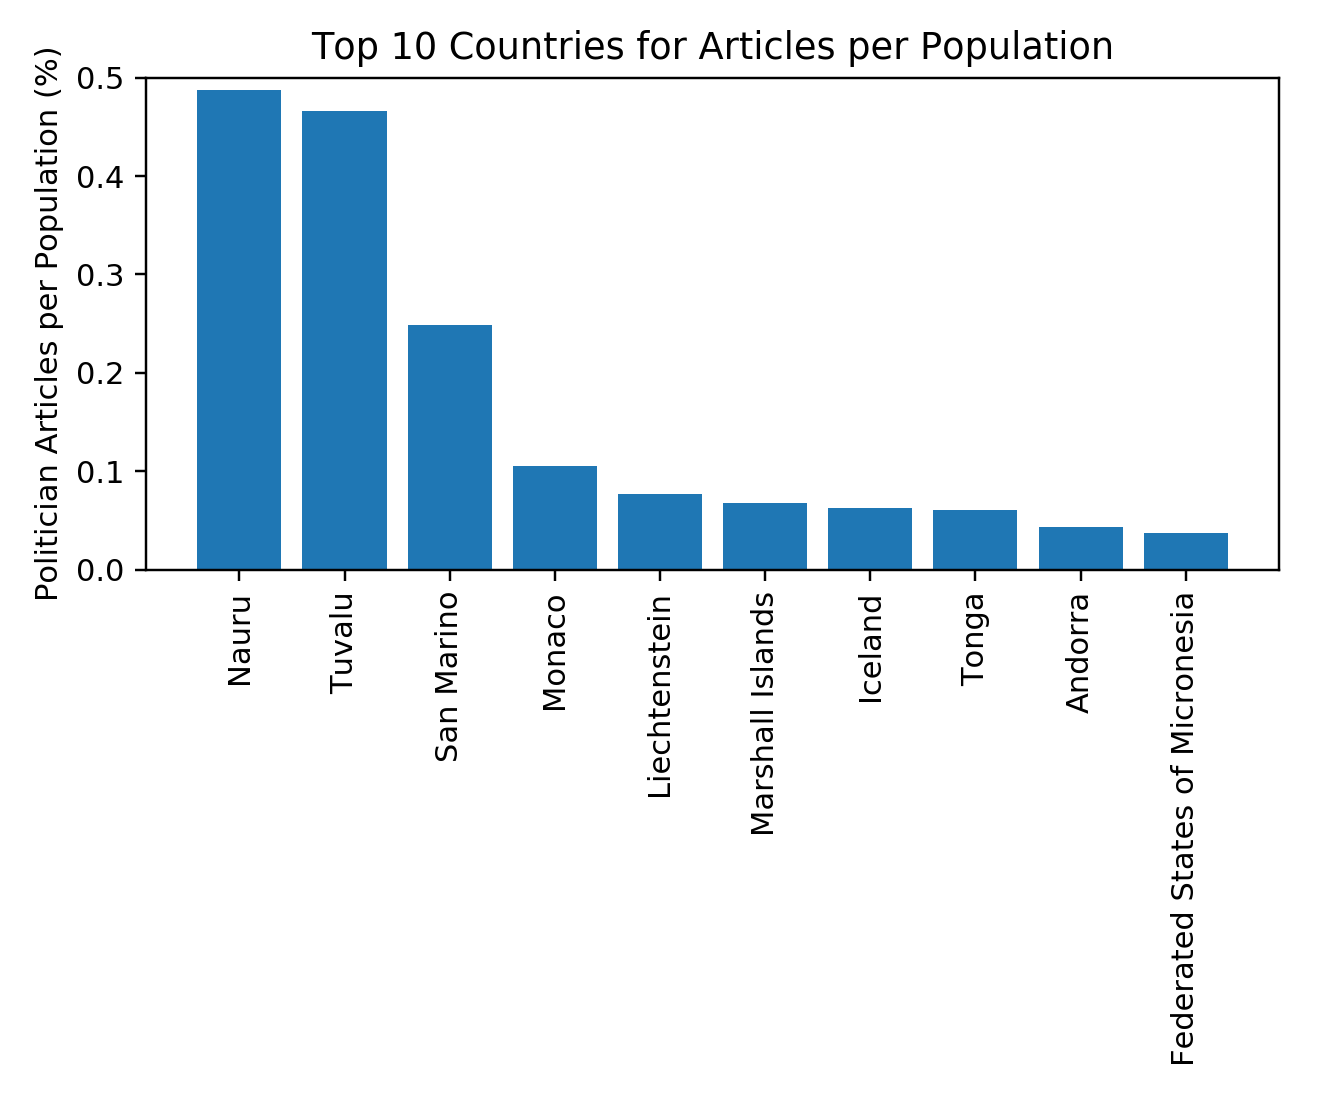

In [33]:
# 10 highest-ranked countries in terms of number of politician articles as a proportion of country population
plt.figure(figsize=(6,5))
plt.bar(range(0,10), cdsorted['article_per_pop_percent'][0:10])
plt.title('Top 10 Countries for Articles per Population')
plt.ylabel('Politician Articles per Population (%)')
plt.xticks(range(0,10), cdsorted['country'][0:10], rotation=90)
plt.ylim((0,0.5))
plt.tight_layout()
plt.savefig('Top10ArticlesperPopulation.jpg')

<IPython.core.display.Javascript object>


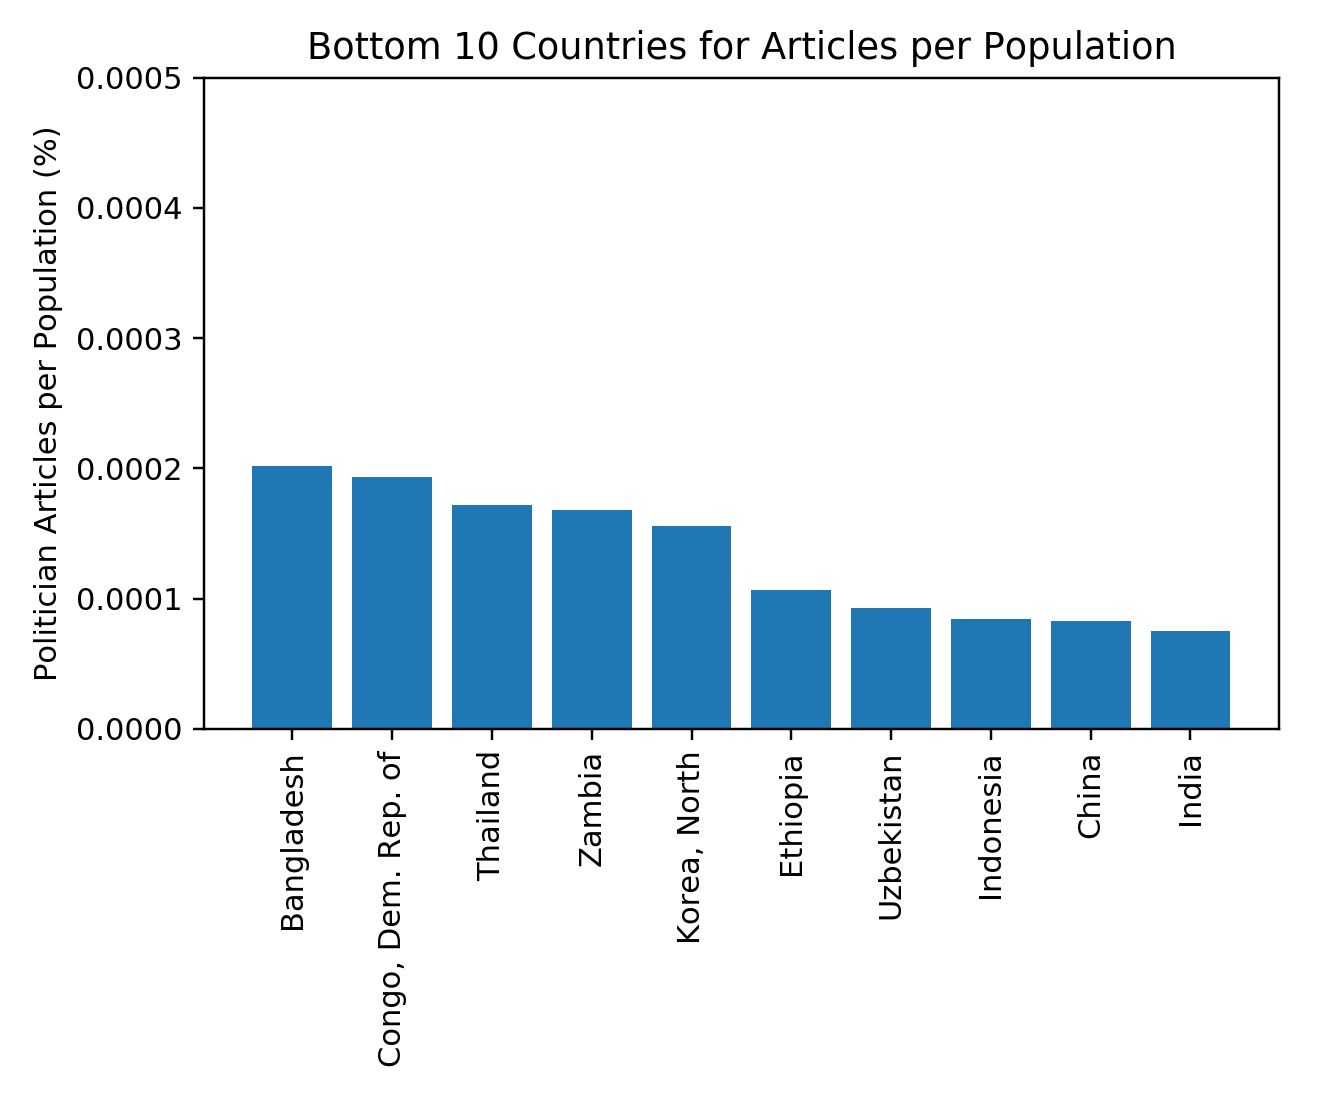

In [34]:
# 10 lowest-ranked countries in terms of number of politician articles as a proportion of country population
plt.figure(figsize=(6,5))
plt.bar(range(0,10), cdsorted['article_per_pop_percent'][-10:])
plt.title('Bottom 10 Countries for Articles per Population')
plt.ylabel('Politician Articles per Population (%)')
plt.xticks(range(0,10), cdsorted['country'][-10:], rotation=90)
plt.ylim((0,0.0005))
plt.tight_layout()
plt.savefig('Bottom10ArticlesperPopulation.jpg')

Create bar graphs for the top 10 and bottom 10 countries with respect percentage of high-quality articles.

In [35]:
# sort countryData by article_per_pop_percent
cdsorted = countryData.sort_values(by='highqual_art_percent', ascending=0)
cdsorted[0:4]

,country,article_per_pop_percent,highqual_art_percent
119,"Korea, North",0.000156,23.076923
55,Romania,0.001754,12.931034
128,Saudi Arabia,0.000377,12.605042
172,Central African Republic,0.001225,11.764706


<IPython.core.display.Javascript object>


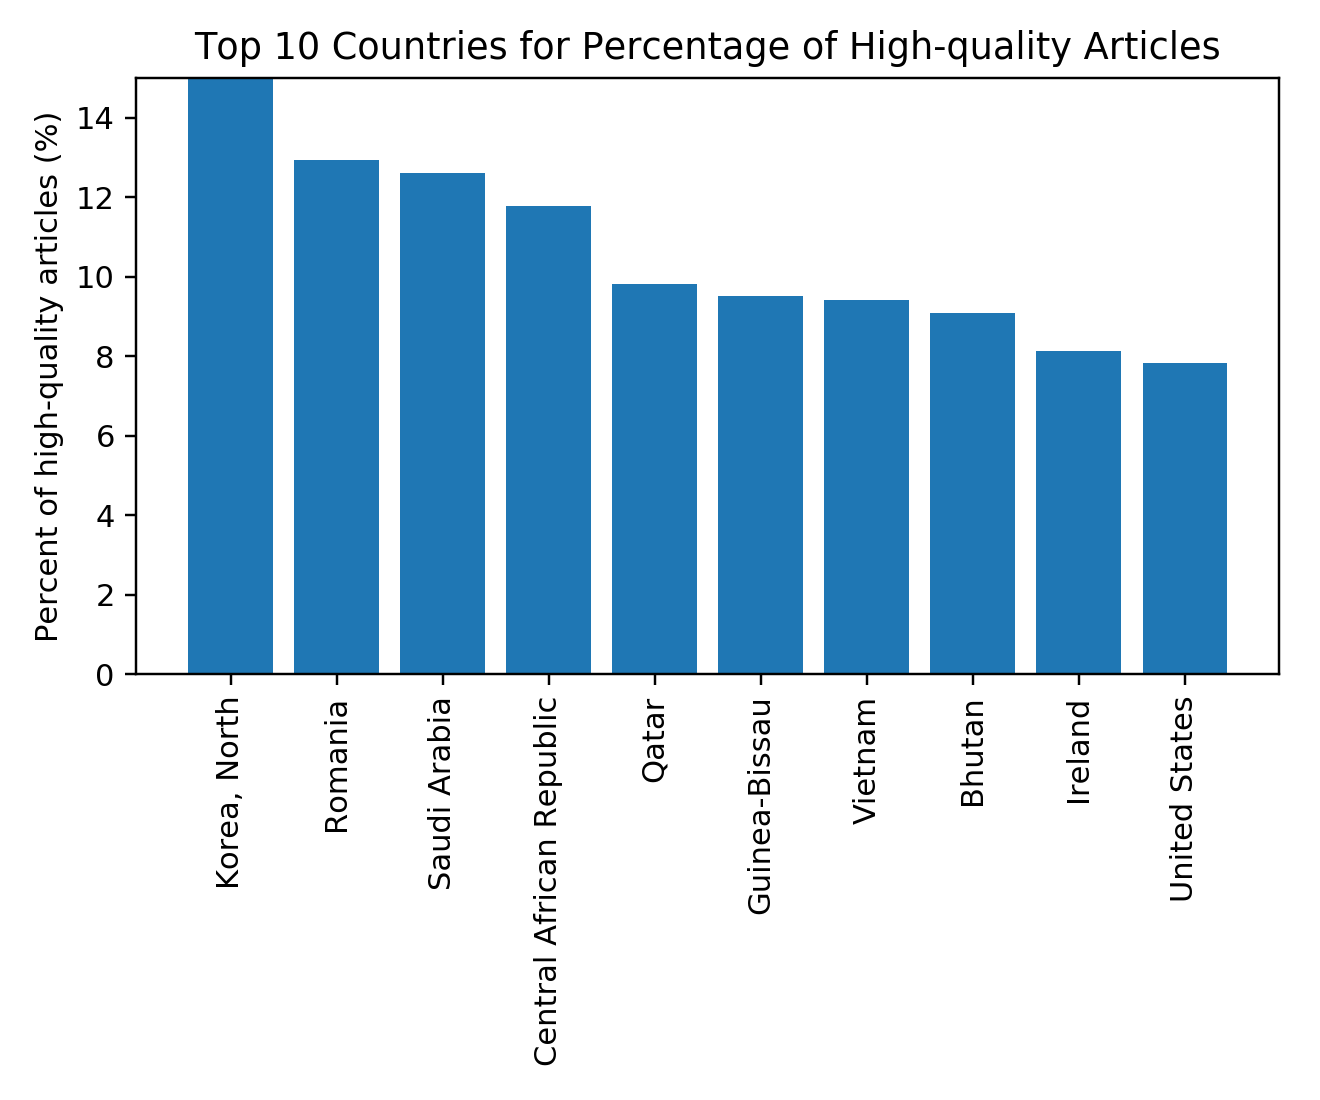

In [36]:
# 10 highest-ranked countries in terms of number of GA and FA-quality articles as a proportion of all articles about politicians from that country
plt.figure(figsize=(6,5))
plt.bar(range(0,10), cdsorted['highqual_art_percent'][0:10])
plt.title('Top 10 Countries for Percentage of High-quality Articles')
plt.ylabel('Percent of high-quality articles (%)')
plt.xticks(range(0,10), cdsorted['country'][0:10], rotation=90)
plt.ylim((0,15))
plt.tight_layout()
plt.savefig('Top10HQArticlespercent.jpg')

<IPython.core.display.Javascript object>


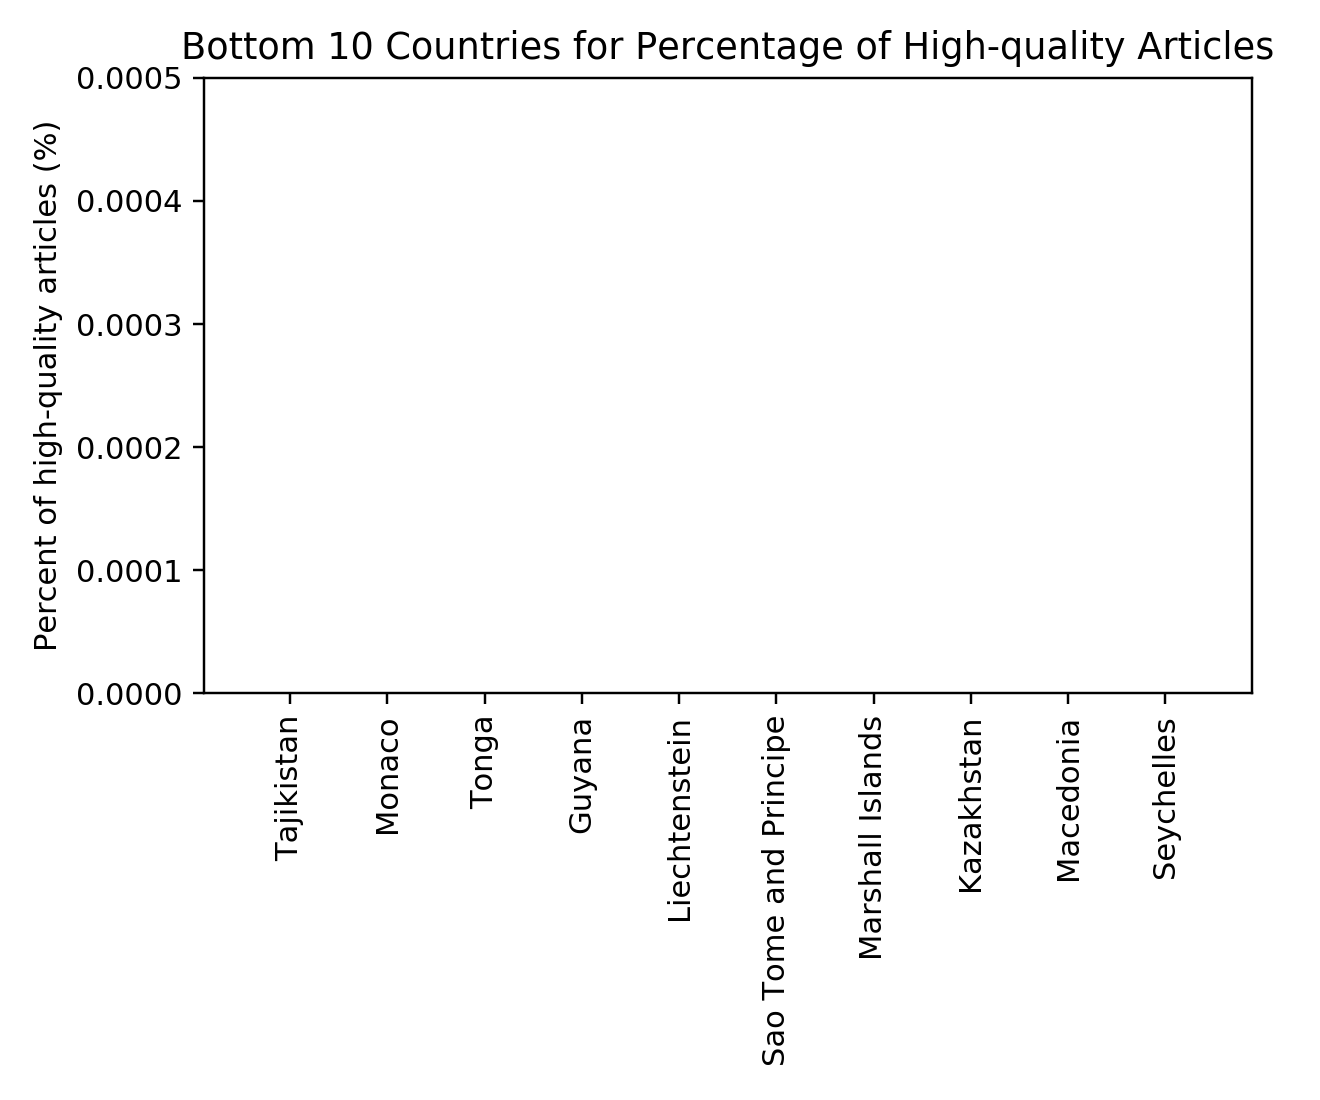

In [37]:
# 10 lowest-ranked countries in terms of number of GA and FA-quality articles as a proportion of all articles about politicians from that country
plt.figure(figsize=(6,5))
plt.bar(range(0,10), cdsorted['highqual_art_percent'][-10:])
plt.title('Bottom 10 Countries for Percentage of High-quality Articles')
plt.ylabel('Percent of high-quality articles (%)')
plt.xticks(range(0,10), cdsorted['country'][-10:], rotation=90)
plt.ylim((0,0.0005))
plt.tight_layout()
plt.savefig('Bottom10HQArticlespercent.jpg')

In [38]:
# Investigate bottom 10 for percentage of high-quality articles
cdsorted['highqual_art_percent'][-10:]

# Okay, they are all zero. So, let's find all the countries that have no high-quality articles.
InoHQ = countryData['highqual_art_percent']==0
print('Total number of countries without high-quality articles: ' + str(sum(InoHQ)))
countryData['country'][InoHQ]

Total number of countries without high-quality articles: 39


0                              Zambia
9                     Solomon Islands
17                              Nepal
24                            Tunisia
63                        Switzerland
65                            Belgium
98                         San Marino
100                      Turkmenistan
102                     French Guiana
103                          Djibouti
115               Antigua and Barbuda
124                             Nauru
127                        Mozambique
131                        Tajikistan
134                            Monaco
138                             Tonga
141                            Guyana
142                     Liechtenstein
143             Sao Tome and Principe
148                  Marshall Islands
151                        Kazakhstan
152                         Macedonia
153                          Kiribati
159                          Suriname
164                           Lesotho
168                           Bahrain
169         

# Conclusions

The results for the top 10 countries for the number of politician articles per population shows a trend of low population countries having a higher percentage. This implies that the number of articles about policitians could have less variation than expected. The surprise in the bottom 10 countries for the number of politician articles per population was China and India. Here the large populations are working again the number of articles to create a lower percentage. I would also wonder about China due to the state enforced censorship on all media. I would consider investigating the number of articles about politician for each country and its correlation to the population. I would hypothesize that there is only a small correlation. The surprise from the percentage of high-quality articles about policitians was the inclusion of Belgium and Belize in the set of countries with no high-quality articles. Belgium is surprising because of its membership in the European Union and Belize is surprising because of its marketing as a vacation destination for forgien travelers, especially from the US and Europe. As for a bias, I'm seeing a trend that favors developed nations. I would propose that this should be expected as under-developed nations would lack the general availability of computers and internet resources to be strong, diverse constributors to Wikipedia. However, this hypotheses would still need further investigation and I would wonder about potential outliers of dictorship countries that might employ state workers to contributed on behalf of the state. 

This assignment reinforced the notation that the hardest, most time consuming work for a data scientist is gather the data and wraggling it into a usable form. Most of my time spend on this assignment was importing the data into Python and arranging it in a dataframe for analysis. This assignment also had some important human center design considerations. Some easier ones were, for example, how to design the graphs to be most impactful and truthfully represent the data for the readers and how to normalize the data from the size of the country and thus, the potential for more policitians. The harder human centered considerations included interpreting the results enlight of the know struggles by many countries in terms of harsh dictorships or lack of economic prosperity. I'm left with the question of how studies like this, about geopolitical topics, can be used to not only raise awarenes of problems but to actually move towards solutions and help the people in harsh dictorships or under-developed countries.  